# Feature Generation

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from tqdm import tqdm
import joblib

from Alpha_Research import Alpha_Research

In [2]:
data_path = "data"
file_name = "data.sav"
file_path = os.path.join(data_path, file_name)

In [3]:
datas = joblib.load(file_path)
data_daily = datas[0]
data_monthly_acc = datas[1]
data_monthly_mkt = datas[2]
data_index = datas[3]
data_classification = datas[4]
data_weight = datas[5]

In [4]:
alpha_dict = dict()
ar = Alpha_Research()

## Analyst Features

In [5]:
features = [data_monthly_mkt['ANDEV'].apply(ar.previous_diff, args=(2,4,))]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['andev_diff'] = ar.backtest(features, operation)

## Accounting Features

In [6]:
features = [data_monthly_acc['ROA'].diff(6)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['roa_diff'] = ar.backtest(features, operation)

In [7]:
features = [data_monthly_acc['ROE'].diff(12)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['roe_diff'] = ar.backtest(features, operation)

In [8]:
features = [data_monthly_acc['OPM'].diff(3)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['opm_diff'] = ar.backtest(features, operation)

In [9]:
features = [data_monthly_acc['SGA'].diff(3)]
def operation(features):
    return (-features[0]).rank(pct=True)
alpha_dict['sga_diff'] = ar.backtest(features, operation)

In [10]:
features = [data_monthly_acc['DPO'].apply(ar.previous_diff, args=(13,25,))]
def operation(features):
    return (-features[0]).rank(pct=True)
alpha_dict['dpo_diff'] = ar.backtest(features, operation)

In [11]:
features = [data_monthly_acc['DIV'].apply(ar.previous_diff, args=(13,25,))]
def operation(features):
    return (-features[0]).rank(pct=True)
alpha_dict['div_diff'] = ar.backtest(features, operation)

In [12]:
features = [data_monthly_acc['CFOP'].apply(ar.previous_diff, args=(13,25,))]
def operation(features):
    return features[0].rank(pct=True)
alpha_dict['cfop_diff'] = ar.backtest(features, operation)

In [13]:
features = [data_monthly_acc['GPM'].diff(36)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['gpm_diff'] = ar.backtest(features, operation)

In [14]:
features = [data_monthly_acc['SG'].apply(ar.previous_diff, args=(13,25,))]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['sg_diff'] = ar.backtest(features, operation)

In [15]:
features = [data_monthly_acc['GPG'].diff(36)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['gpg_diff'] = ar.backtest(features, operation)

In [16]:
features = [data_monthly_acc['OPG'].diff(36)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['opg_diff'] = ar.backtest(features, operation)

In [17]:
features = [(data_monthly_acc['GP']/data_monthly_mkt['CAP']).diff(4)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['gpc_diff'] = ar.backtest(features, operation)

## Market Features

In [18]:
features = [data_monthly_mkt['V20'].diff(1)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['v20_diff'] = ar.backtest(features, operation)

In [19]:
features = [(data_monthly_mkt['ADV20']/data_monthly_mkt['ADV52']).diff(1)]
def operation(features):
    return (features[0]).rank(pct=True)
alpha_dict['adv20adv52_diff'] = ar.backtest(features, operation)

## Alpha Pool Analysis

v20_diff and adv20adv52_diff have correlation: 0.68
cfop_diff and gpm_diff have correlation: 0.57
sg_diff and gpg_diff have correlation: 0.56
roe_diff and cfop_diff have correlation: 0.53
gpm_diff and opg_diff have correlation: 0.52
                 2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Min Long Count     67    61    58    66    81    85    90    93    92    95   
Min Short Count    60    62    63    62    80    77    89    88    94    84   

                 2020  2021  2022  2023  
Min Long Count     94    90    98    94  
Min Short Count    91    96    94    91  


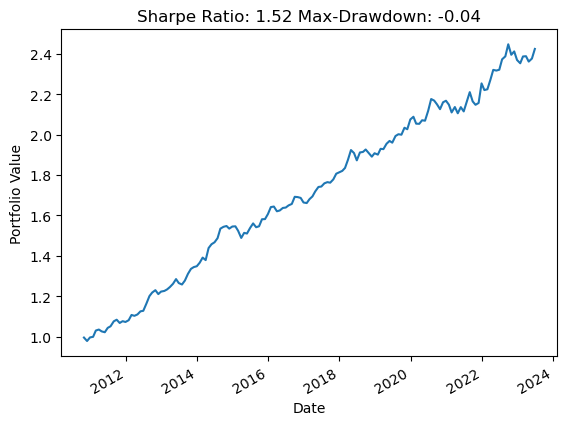

In [20]:
ar.alpha_pool(alpha_dict)

## Extra Time Series Data

In [21]:
market_dict = dict()
# basic
market_dict['ADJC'] = ar.monthly_resampling(data_daily['ADJC'])
market_dict['V'] = ar.monthly_resampling(data_daily['V'])

# shift
for i in range(1, 13):
    market_dict[f'ADJC_{i}'] = market_dict['ADJC'].shift(i)
    market_dict[f'V_{i}'] = market_dict['V'].shift(i)

# ts_zscores
for i in [10, 20, 40, 60, 120, 252]:
    market_dict[f'ADJC_Z_{i}'] = data_daily['ADJC'].apply(ar.ts_zscore, args=(5,))
    market_dict[f'V_Z_{i}'] = data_daily['ADJC'].apply(ar.ts_zscore, args=(5,))
    for j in range(1, 13):
        market_dict[f'ADJC_Z_{i}_{j}'] = market_dict[f'ADJC_Z_{i}'].shift(1)
        market_dict[f'V_Z_{i}_{j}'] = market_dict[f'ADJC_Z_{i}'].shift(1)

# highs
market_dict['HIGH20'] = ar.monthly_resampling(data_daily['ADJC'].rolling(20).max())
market_dict['HIGH40'] = ar.monthly_resampling(data_daily['ADJC'].rolling(40).max())
market_dict['HIGH60'] = ar.monthly_resampling(data_daily['ADJC'].rolling(60).max())
market_dict['HIGH120'] = ar.monthly_resampling(data_daily['ADJC'].rolling(120).max())
market_dict['HIGH52'] = data_monthly_mkt['HIGH52']

# lows
market_dict['LOW20'] = ar.monthly_resampling(data_daily['ADJC'].rolling(20).min())
market_dict['LOW40'] = ar.monthly_resampling(data_daily['ADJC'].rolling(40).min())
market_dict['LOW60'] = ar.monthly_resampling(data_daily['ADJC'].rolling(60).min())
market_dict['LOW120'] = ar.monthly_resampling(data_daily['ADJC'].rolling(120).min())
market_dict['LOW52'] = data_monthly_mkt['LOW52']

# avg
market_dict['AVG20'] = data_monthly_mkt['AVG20']
market_dict['AVG40'] = ar.monthly_resampling(data_daily['ADJC'].rolling(40).mean())
market_dict['AVG60'] = ar.monthly_resampling(data_daily['ADJC'].rolling(60).mean())
market_dict['AVG120'] = ar.monthly_resampling(data_daily['ADJC'].rolling(120).mean())
market_dict['AVG52'] = ar.monthly_resampling(data_daily['ADJC'].rolling(120).mean())

# return
market_dict['RET10'] = data_monthly_mkt['RET1W'] / 100
market_dict['RET20'] = data_monthly_mkt['RET20'] / 100
market_dict['RET40'] = ar.monthly_resampling(data_daily['ADJC'].pct_change(40))
market_dict['RET60'] = data_monthly_mkt['RET3M'] / 100
market_dict['RET120'] = data_monthly_mkt['RET6M'] / 100
market_dict['RET52'] = data_monthly_mkt['RET1Y'] / 100

# vol
market_dict['VOL5'] = data_monthly_mkt['VOL5']
market_dict['VOL20'] = data_monthly_mkt['VOL20']
market_dict['VOL60'] = data_monthly_mkt['VOL60']
market_dict['VOL120'] = data_monthly_mkt['VOL120']
market_dict['VOL52'] = data_monthly_mkt['VOL52']

# adv
market_dict['ADV20'] = data_monthly_mkt['ADV20']
market_dict['ADV52'] = data_monthly_mkt['ADV52']

# cap
market_dict['ADV52'] = data_monthly_mkt['ADV52']

In [22]:
extras_dict = dict()
for i, v in tqdm(market_dict.items()):
    features = [v]
    def operation(features):
        return (features[0]).rank(pct=True)
    extras_dict[i.lower()] = ar.backtest(features, operation)

100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [11:17<00:00,  3.23s/it]


## Training Data Stacking

In [23]:
stack_list = []
for ticker in tqdm(ar.df_target.columns):
    temp_dict = dict()
    for alpha in list(alpha_dict.keys()):
        try:
            temp_dict[alpha] = alpha_dict[alpha][1][ticker]
        except KeyError:
            pass
    
    for extra in list(extras_dict.keys()):
        try:
            temp_dict[extra] = extras_dict[extra][1][ticker]
        except KeyError:
            pass
    
    temp_dict['fgsc'] = ar.fgsc[ticker]
    temp_dict['year'] = [i.year for i in list(ar.df_target.index)]
    temp_dict['month'] = [i.month for i in list(ar.df_target.index)]
    temp_dict['target'] = ar.df_target[ticker]

    df_temp = pd.DataFrame(temp_dict)
    df_temp.reset_index(inplace=True)
    df_temp.rename(columns={'index':'Date'}, inplace=True)
    df_temp['Ticker'] = ticker
    
    df_temp.set_index(['Date', 'Ticker'], inplace=True)
    stack_list.append(df_temp)

100%|████████████████████████████████████████████████████████████████████████████████| 526/526 [00:10<00:00, 48.88it/s]


In [24]:
df_stack = pd.DataFrame()
df_stack = pd.concat(stack_list, axis=0)
df_stack = df_stack[df_stack.iloc[:,:-1].notnull().sum(axis=1)>5]
df_stack = df_stack[~df_stack.iloc[:,-1].isna()]
LB = np.percentile(df_stack.iloc[:,-1], 1)
UB = np.percentile(df_stack.iloc[:,-1], 99)
df_stack['target'] = df_stack['target'].clip(lower=LB, upper=UB)
df_stack.sort_values(['Date'], inplace=True)
df_stack['fgsc'] = df_stack['fgsc'].astype("category")

In [25]:
# demean by date and sector
demean_list = []
for dt in tqdm(ar.df_target.index):
    for sc in ar.fgsc.unique():
        temp = df_stack.loc[(dt, slice(None)), :].copy()
        temp = temp[temp['fgsc']==sc]
        temp['target'] = temp['target'].sub(temp['target'].mean())
        demean_list.append(temp)
df_stack = pd.concat(demean_list, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [00:02<00:00, 67.93it/s]


In [26]:
stack_name = os.path.join(data_path, "data_stack.h5")
df_stack.to_hdf(stack_name, key='df', mode='w', format="table")